##### Libraries reqired

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

##### Data collection & Processing

In [2]:
# Loading the data from csv to pandas dataframe
car_dataset = pd.read_csv('Cars_Dataset.csv')

In [3]:
# Read first 5 rows of dataset
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# Shape of dataset
print(car_dataset.shape)

(4340, 8)


In [7]:
# Checking distribution of categorical data
print(car_dataset['fuel'].value_counts())
print(car_dataset['seller_type'].value_counts())
print(car_dataset['transmission'].value_counts())
print(car_dataset['owner'].value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


##### Encoding the categorical data

In [8]:
# Encoding "fuel" column
car_dataset.replace({'fuel': {'CNG': 0, 'Diesel': 1, 'Electric': 2, 'LPG': 3, 'Petrol': 4}}, inplace=True)

# Encoding "seller_type" column
car_dataset.replace({'seller_type': {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}}, inplace=True)

# Encoding "tranmission" column
car_dataset.replace({'transmission': {'Automatic': 0, 'Manual': 1}}, inplace=True)

# Encoding "owner" column
car_dataset.replace({'owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6996\225770381.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel': {'CNG': 0, 'Diesel': 1, 'Electric': 2, 'LPG': 3, 'Petrol': 4}}, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6996\225770381.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type': {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}}, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6996\225770381.py:8: FutureWarning: Downcasting behavior 

In [9]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,1


##### Splitting the data and target

In [10]:
X =  car_dataset.drop(columns=['selling_price','name'],axis=1)
Y =  car_dataset['selling_price']

In [11]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     4            1             1      0
1     2007      50000     4            1             1      0
2     2012     100000     1            1             1      0
3     2017      46000     4            1             1      0
4     2014     141000     1            1             1      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             1      1
4336  2014      80000     1            1             1      1
4337  2009      83000     4            1             1      1
4338  2016      90000     1            1             1      0
4339  2016      40000     4            1             1      0

[4340 rows x 6 columns]


In [12]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


##### Splitting Training and Testing

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3472, 6) (868, 6)


##### Model Training

##### 1.Linear Regession

In [15]:
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Model Evaluation

In [17]:
# Prediction of training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Error: ',error_score)

R2 Error:  0.4373826797075344


##### Visualize actual price amd predicted price

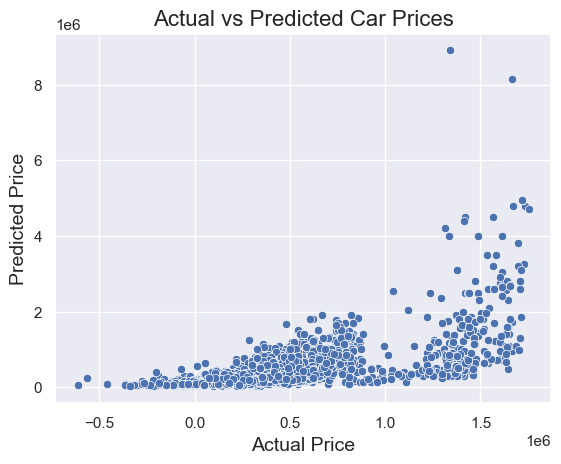

In [22]:
sns.set()
sns.scatterplot(x=training_data_prediction, y=Y_train)

plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.show()


In [31]:
# Prediction of testing data
testing_data_prediction = lin_reg_model.predict(X_test)
# R square error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print('R2 Error: ',error_score)

R2 Error:  0.49354363020231495


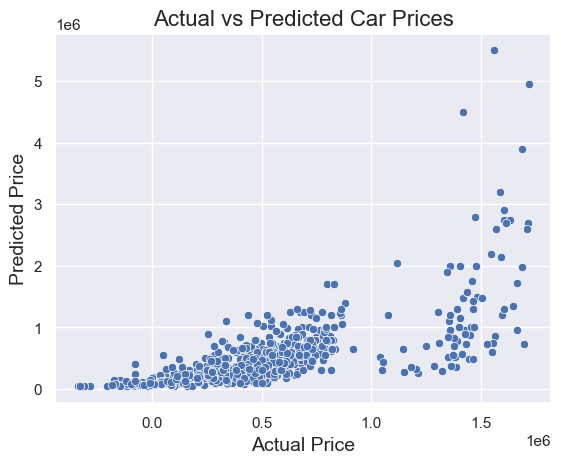

In [40]:
sns.scatterplot(x=testing_data_prediction, y=Y_test)
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.show()

##### 2.Lasso Regression

In [33]:
las_reg_model = Lasso()
las_reg_model.fit(X_train,Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [34]:
# Prediction of training data
training_data_prediction = las_reg_model.predict(X_train)

In [35]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R2 Error: ',error_score)

R2 Error:  0.43738267966081235


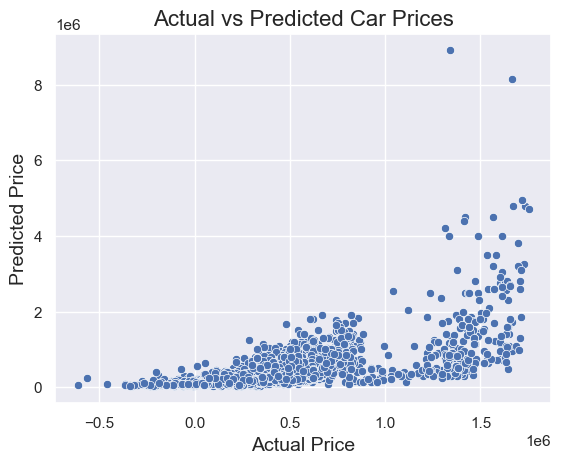

In [39]:
sns.scatterplot(x=training_data_prediction, y=Y_train)
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.show()

In [38]:
# Prediction of testing data
testing_data_prediction = las_reg_model.predict(X_test)
# R square error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print('R2 Error: ',error_score)

R2 Error:  0.49354354298902037


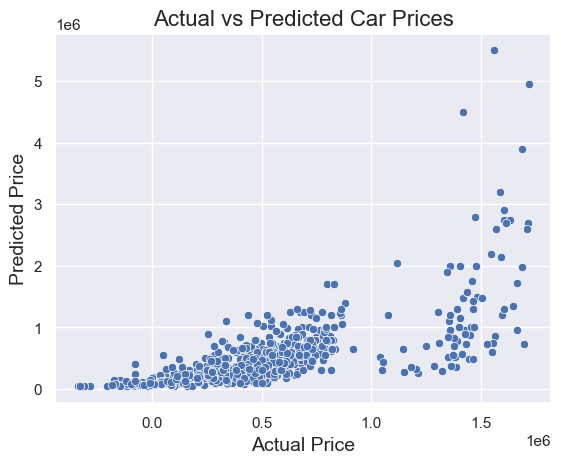

In [41]:
sns.scatterplot(x=testing_data_prediction, y=Y_test)
plt.title('Actual vs Predicted Car Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.show()